# Turismo de Portugal em Gráficos  com seaborn


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter
filename = 'pordata1.xls'
class ScalarFormatterClass(ScalarFormatter):
   def _set_format(self):
      self.format = "%1.2f"




Com os dados do ficheiro pordata1.xls, usando a interface orientada a objetos do 
Seaborn, obtenha os seguintes gráficos: 
1. Gráfico da evolução ao longo dos anos nas regiões NUTS III da média e máximo 
do valor total. 


C:\Users\moham\AppData\Local\Temp\ipykernel_11768\2844184982.py:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  pordata_temp.loc['Média',:] = pordata_temp.iloc[1:,:].mean()
C:\Users\moham\AppData\Local\Temp\ipykernel_11768\2844184982.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pordata_temp.loc['Média',:] = pordata_temp.iloc[1:,:].mean()
C:\Users\moham\AppData\Local\Temp\ipykernel_11768\2844184982.py:7: FutureWarning: The default value of numeric_only in DataFrame.max is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=

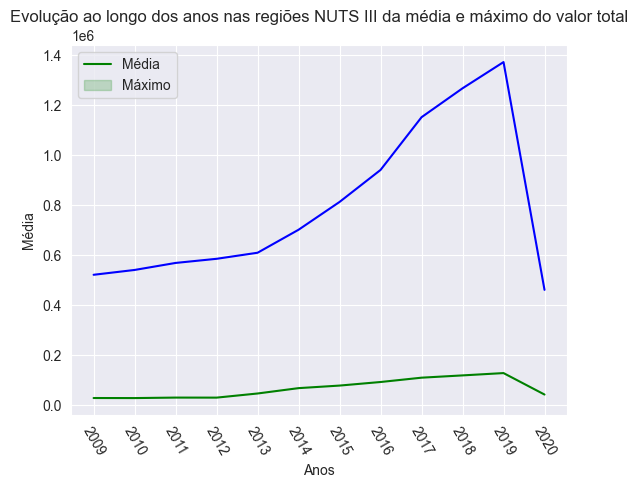

In [28]:
pordata = pd.read_excel(io=filename,index_col='Âmbito Geográfico',skiprows=[0])
fig, ax = plt.subplots(1)


pordata_temp = pordata.loc['NUTS III']
pordata_temp.loc['Média',:] = pordata_temp.iloc[1:,:].mean()
pordata_temp.loc['Máximo',:] = pordata_temp.iloc[1:,:].max() 
pordata_total= pordata_temp.iloc[:,0:13].transpose()


fig =sns.lineplot(data=pordata_total,x=pordata_total.index.str[6:],y='Média', ax=ax,color='g')
fig.set_xticklabels(fig.get_xticklabels(), rotation=-60)
fig =sns.lineplot(data=pordata_total,x=pordata_total.index.str[6:],y='Máximo', ax=ax,color='b')
ax.legend(['Média','Máximo'])
ax.set_title('Evolução ao longo dos anos nas regiões NUTS III da média e máximo do valor total')
ax.set_xlabel('Anos')
fig.get_figure().savefig('../Guiao7/images/turismo_sns/ex1.pdf')
plt.subplots_adjust(hspace=0.8)


Gráfico da evolução ao longo dos anos dos valores mínimo, médio e máximo do 
valor total de um dado Âmbito Geográfico (ex: Município). Desenvolva uma 
função que tenha como parâmetros uma DataFrame e uma string com o Âmbito 
Geográfico. Teste a função criando gráficos para NUTS I, NUTS II, NUT III e 
Munícipio. 

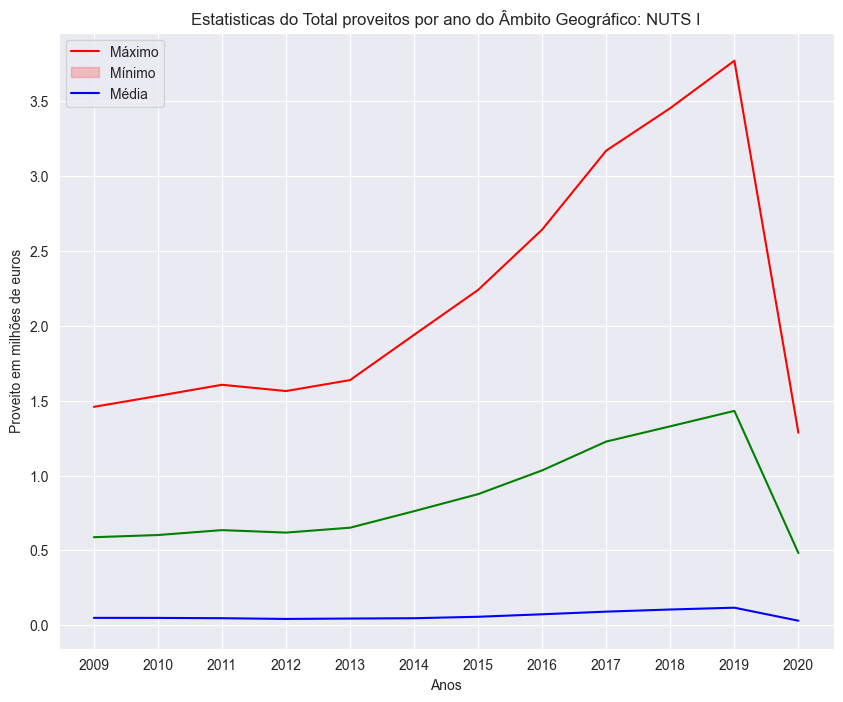

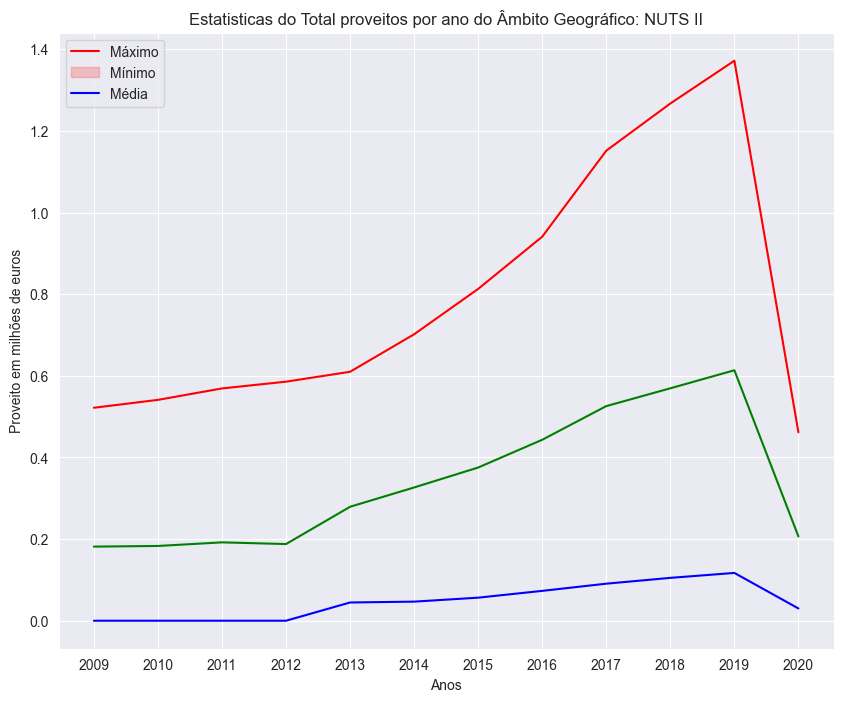

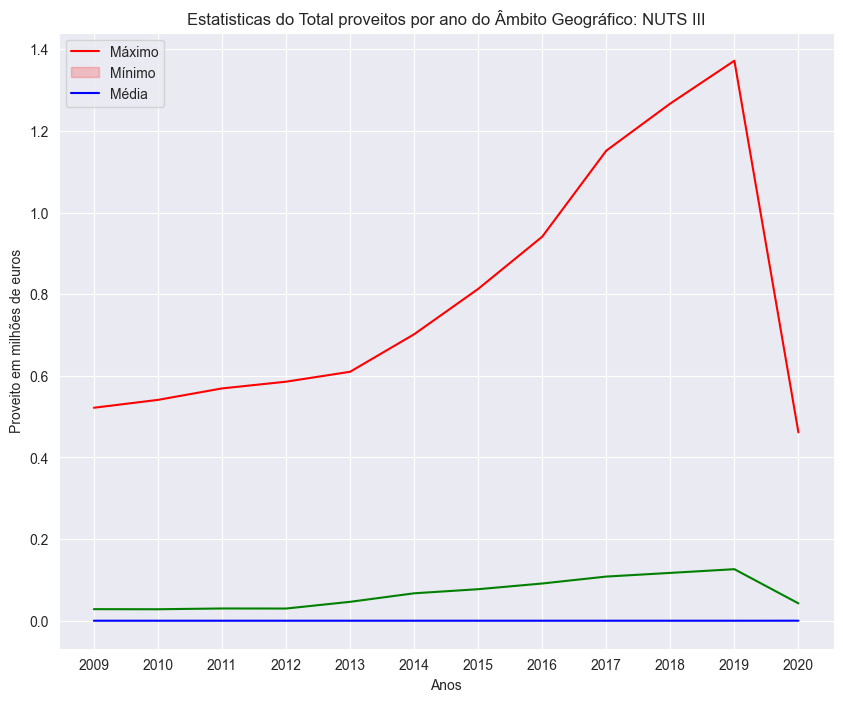

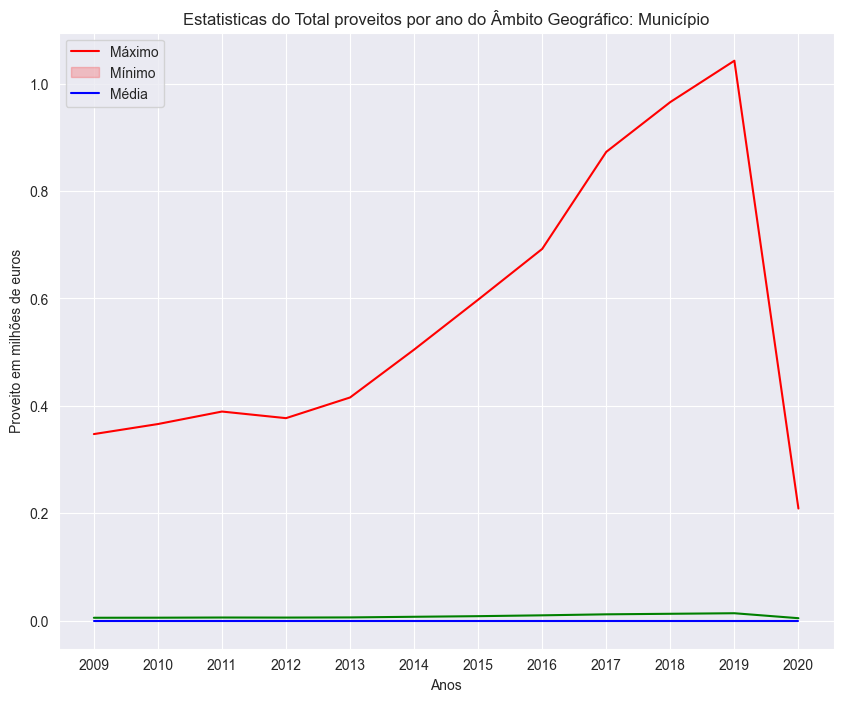

In [29]:
def stsgraph1(ag,pordata):
    sns.set_style('darkgrid')
    pordata_temp = pordata.loc[ag]
    x = list(str(i) for i in range(2009,pordata.columns[1:13].__len__()+2009))
    y_min=[]
    y_max=[]
    y_mean=[]
    for i in pordata.columns[1:]:
        y_max.append(pordata_temp[i].max() / 1e+6)
        y_min.append(pordata_temp[i].min() / 1e+6)
        y_mean.append(pordata_temp[i].mean() / 1e+6)
    fig, ax1 = plt.subplots()
    fig.set_size_inches(10,8)
    ax1.set_title('Estatisticas do Total proveitos por ano do Âmbito Geográfico: '+ag)
    sns.lineplot(x=x,y=y_max[0:12],color='r',ax=ax1)
    sns.lineplot(x=x,y=y_min[0:12],color='b',ax=ax1)
    sns.lineplot(x=x,y=y_mean[0:12],color='g',ax=ax1)
    ax1.legend(labels=['Máximo','Mínimo','Média'])

    ax1.set_xlabel('Anos')
    ax1.set_ylabel('Proveito em milhões de euros')
    fig.savefig('../Guiao7/images/turismo_sns/ex2_'+ag+'.pdf')

    
stsgraph1('NUTS I',pordata)
stsgraph1('NUTS II',pordata)
stsgraph1('NUTS III',pordata)
stsgraph1('Município',pordata)

Histogramas dos valores apenas dos Hotéis para dois anos indicados como 
parâmetros considerando os dados para um determinado âmbito geográfico (ex: 
NUTS III). A função a desenvolver deve ter ainda como parâmetro o “Âmbito 
Geográfico”, com o valor por defeito “NUTS III”. Os 2 histogramas devem ficar 
lado a lado. 


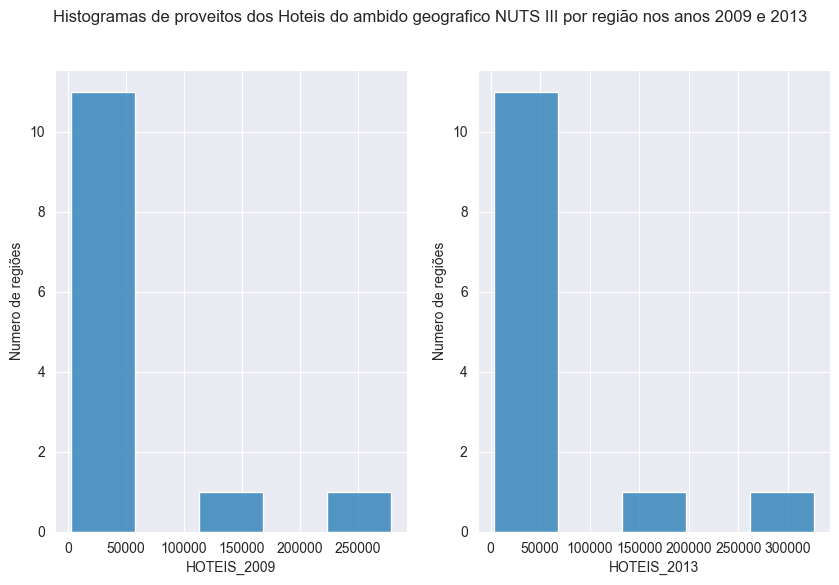

In [30]:
def stsHotel_years(year_1,year_2,ag='NUTS III'):
    fig, axs = plt.subplots(1,2)
    fig.set_size_inches(10,6)
    fig.subplots_adjust(wspace=0.2)


    x1 = ('HOTEIS_'+str(year_1))
    x2 = ('HOTEIS_'+str(year_2))
    data1 = pordata.loc[ag,[x1,x2]]
    data1 = data1[(data1 >0).all(1)]


    sns.histplot(data=data1,x=x1,ax=axs[0],bins=5)
    sns.histplot(data=data1,x=x2,ax=axs[1],bins=5)
    

    axs[0].set_ylabel('Numero de regiões')
    axs[1].set_ylabel('Numero de regiões')
    fig.suptitle('Histogramas de proveitos dos Hoteis do ambido geografico '+ag+' por região nos anos ' +str(year_1) +' e '+ str(year_2))

    fig.savefig('../Guiao7/images/turismo_sns/ex3.pdf')
   
   
stsHotel_years(2009,2013)

Boxplots dos valores totais das regiões NUTS II. 


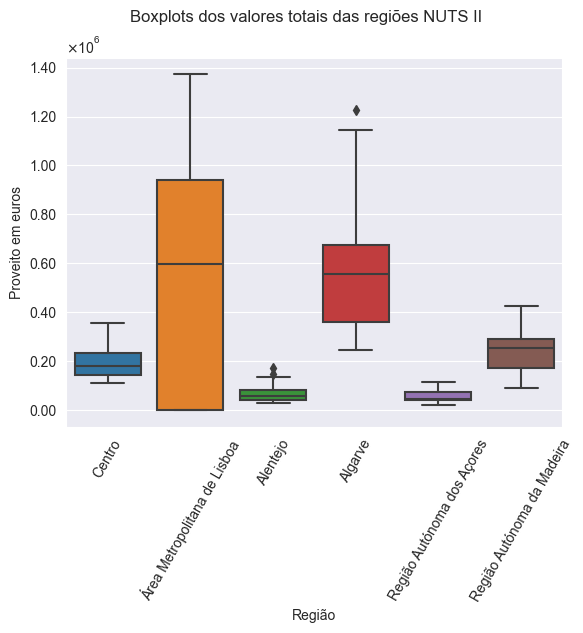

In [31]:

fig, axs = plt.subplots(1)

data3 = pordata.loc['NUTS II'].reset_index().iloc[1:,1:].transpose()
data3.columns = data3.iloc[0,:]
data3 = data3.iloc[1:,:]
axs = sns.boxplot(data=data3,ax=axs)
axs.set_xticklabels(axs.get_xticklabels(), rotation=60)
yScalarFormatter = ScalarFormatterClass(useMathText=True)
yScalarFormatter.set_powerlimits((0,0))
axs.yaxis.set_major_formatter(yScalarFormatter)
fig.suptitle('Boxplots dos valores totais das regiões NUTS II')
axs.set_ylabel('Proveito em euros')
fig.savefig('../Guiao7/images/turismo_sns/ex4.pdf')


Representação usando barras da mediana entre 2009 e 2020 para os 10 municípios com maiores 
proveitos totais no conjunto destes anos. 


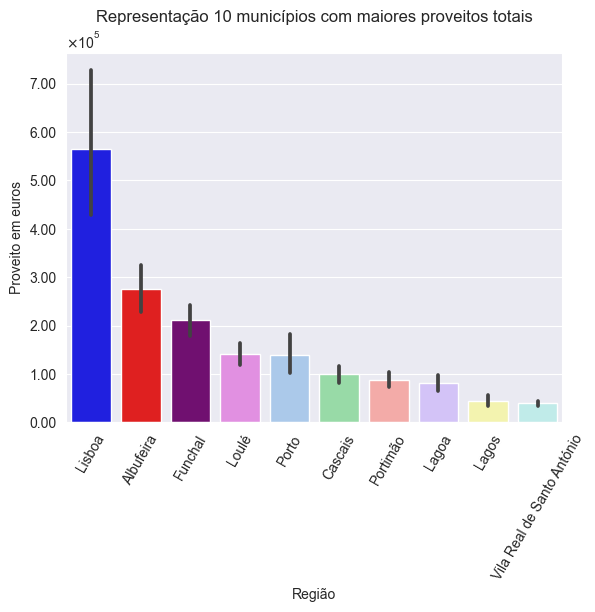

In [32]:
# filtrar e processar os dados
pordata_mun= pordata.loc['Município','Região':'TOTAL_2020']
pordata_mun_t = pordata_mun.loc[:,'TOTAL_2009':].sum(axis=1)
pordata_mun['Soma'] = pordata_mun_t
pordata_mun_10L = pordata_mun.nlargest(10,columns='Soma').iloc[:,:-1]
pordata_mun_10L = pd.DataFrame(pordata_mun_10L.values.transpose()[1:],columns=pordata_mun_10L.values.transpose()[0])
# plotar
fig, axs = plt.subplots(1)
colors=['blue','red','purple','violet','#a1c9f4', '#8de5a1', '#ff9f9b', '#d0bbff', '#fffea3', '#b9f2f0' ]
fig = sns.barplot(data=pordata_mun_10L, palette = sns.color_palette(colors),ax=axs)
fig.set_xticklabels(fig.get_xticklabels(), rotation=60)
yScalarFormatter = ScalarFormatterClass(useMathText=True)
yScalarFormatter.set_powerlimits((0,0))
axs.yaxis.set_major_formatter(yScalarFormatter)
axs.set_ylabel('Proveito em euros')
axs.set_xlabel('Região')
axs.set_title('Representação 10 municípios com maiores proveitos totais')
pordata_mun10 = pordata_mun.nlargest(10,columns='Soma')
fig.get_figure().savefig('../Guiao7/images/turismo_sns/ex5.pdf')


